
 Model Accuracy: 0.5279297503563054

 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49     10636
           1       0.53      0.60      0.56     11115

    accuracy                           0.53     21751
   macro avg       0.53      0.53      0.52     21751
weighted avg       0.53      0.53      0.53     21751


 Confusion Matrix:
 [[4858 5778]
 [4490 6625]]


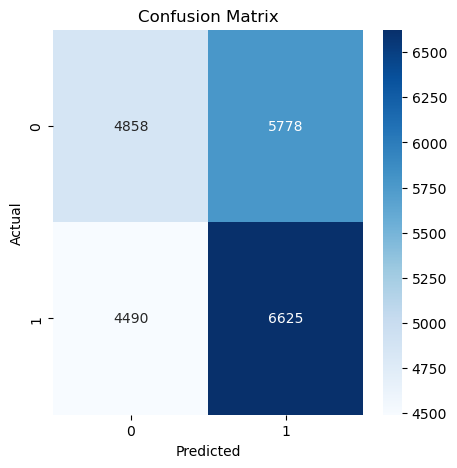

In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Step 1: Load Data
file_path = "/Users/udaysinghshekhawat/Documents/news sentimental modle/Sentiment_Stock_data.csv"
df = pd.read_csv(file_path)

#  Step 2: Preprocess Text
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove extra spaces
    return text

df['Cleaned_Sentence'] = df['Sentence'].astype(str).apply(clean_text)

#  Step 3: Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=5000)  # Using 5000 most frequent words
X = vectorizer.fit_transform(df['Cleaned_Sentence'])
y = df['Sentiment']  # Assuming Sentiment is 0 (negative), 1 (positive)

#  Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 5: Train Model (Logistic Regression)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

#  Step 6: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n Model Accuracy:", accuracy)
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#  Step 7: Plot Confusion Matrix
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
from sklearn.svm import SVC

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\n SVM Model Accuracy:", accuracy_svm)
print("\n Classification Report:\n", classification_report(y_test, y_pred_svm))



 SVM Model Accuracy: 0.5271022021976001

 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.43      0.47     10636
           1       0.53      0.62      0.57     11115

    accuracy                           0.53     21751
   macro avg       0.53      0.52      0.52     21751
weighted avg       0.53      0.53      0.52     21751

